## Titanic - Machine Learning from Disaster

### Competition

### Data Set

(1) train.csv¶

train.csv contains the details of a subset of the passengers on board (891 passengers, to be exact -- where each passenger gets a different row in the table). To investigate this data, click on the name of the file on the left of the screen. Once you've done this, you can view all of the data in the window.

The values in the second column ("Survived") can be used to determine whether each passenger survived or not:

if it's a "1", the passenger survived.

if it's a "0", the passenger died.

For instance, the first passenger listed in train.csv is Mr. Owen Harris Braund. He was 22 years old when he died on the Titanic.

(2) test.csv

Using the patterns you find in train.csv, you have to predict whether the other 418 passengers on board (in test.csv) survived.

Click on test.csv (on the left of the screen) to examine its contents. Note that test.csv does not have a "Survived" column - this information is hidden from you, and how well you do at predicting these hidden values will determine how highly you score in the competition!

(3) gender_submission.csv

The gender_submission.csv file is provided as an example that shows how you should structure your predictions. It predicts that all female passengers survived, and all male passengers died. Your hypotheses regarding survival will probably be different, which will lead to a different submission file. But, just like this file, your submission should have:

a "PassengerId" column containing the IDs of each passenger from test.csv.

a "Survived" column (that you will create!) with a "1" for the rows where you think the passenger survived, and a "0" where you predict that the passenger died.

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt # for data visualization
import seaborn as sns # for statistical data visualization


In [2]:
train_data = pd.read_csv("titanic_train.csv")
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
test_data = pd.read_csv("titanic_test.csv")
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


### Data preparation

In [4]:
train_data = train_data.drop(['PassengerId', 'Name', 'Ticket'], axis=1)
test_data = test_data.drop(['PassengerId', 'Name', 'Ticket'], axis=1)

In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Cabin     204 non-null    object 
 8   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


In [6]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    object 
 2   Age       332 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      417 non-null    float64
 6   Cabin     91 non-null     object 
 7   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(3)
memory usage: 26.3+ KB


- survival  |	Survival    |	0 = No, 1 = Yes
- pclass    |	Ticket Class    |	1 = 1st, 2 = 2nd, 3 = 3rd
- sex   |	Sex	
- Age   |	Age in Years	
- sibsp |	# of siblings / spouses aboard the Titanic	
- parch |	# of parents / children aboard the Titanic	
- ticket    |	Ticket Number	
- fare  |	Passenger Fare	
- cabin |	Cabin Number	
- embarked  |	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton

In [7]:
train_data['Sex'] = train_data['Sex'].astype('string')
test_data['Sex'] = test_data['Sex'].astype('string')

In [8]:
# Check the count of missing values per variable
train_data.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [9]:
test_data.isnull().sum()

Pclass        0
Sex           0
Age          86
SibSp         0
Parch         0
Fare          1
Cabin       327
Embarked      0
dtype: int64

In [10]:
# Check the percentage of missing values per variable
train_data.isnull().mean()

Survived    0.000000
Pclass      0.000000
Sex         0.000000
Age         0.198653
SibSp       0.000000
Parch       0.000000
Fare        0.000000
Cabin       0.771044
Embarked    0.002245
dtype: float64

In [11]:
test_data.isnull().mean()

Pclass      0.000000
Sex         0.000000
Age         0.205742
SibSp       0.000000
Parch       0.000000
Fare        0.002392
Cabin       0.782297
Embarked    0.000000
dtype: float64

Text(0.5, 0, 'Age')

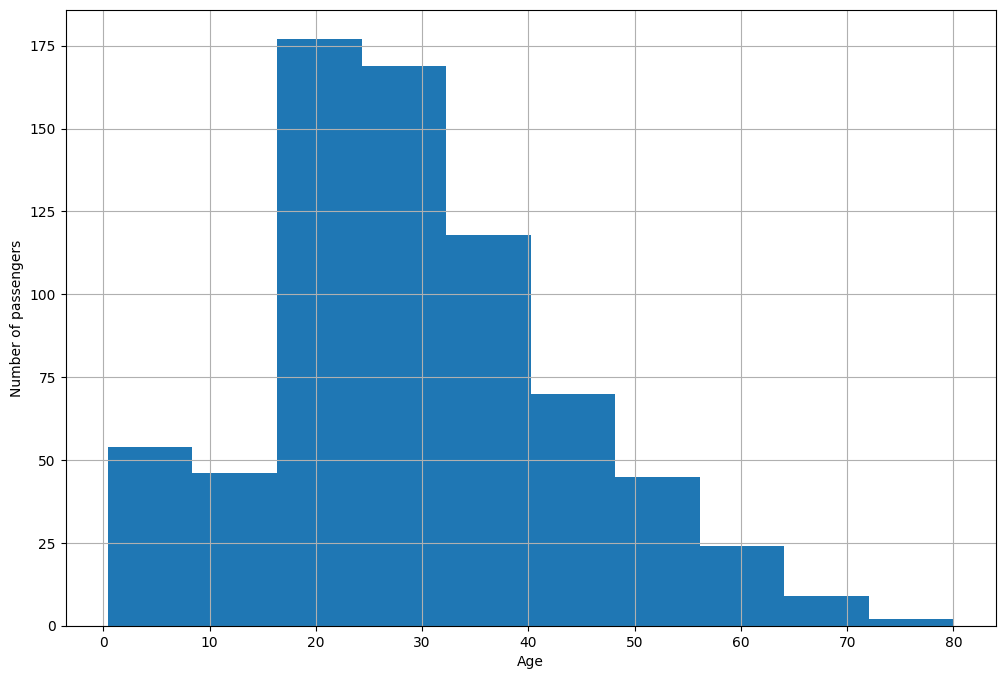

In [12]:
# Age is a continuous variable
# First, we will check the distribution of age variable

# Plot the distribution of age to find out if they are Gaussian or skewed
plt.figure(figsize=(12,8))
fig = train_data.Age.hist(bins=10)
fig.set_ylabel('Number of passengers')
fig.set_xlabel('Age')

Text(0.5, 0, 'Age')

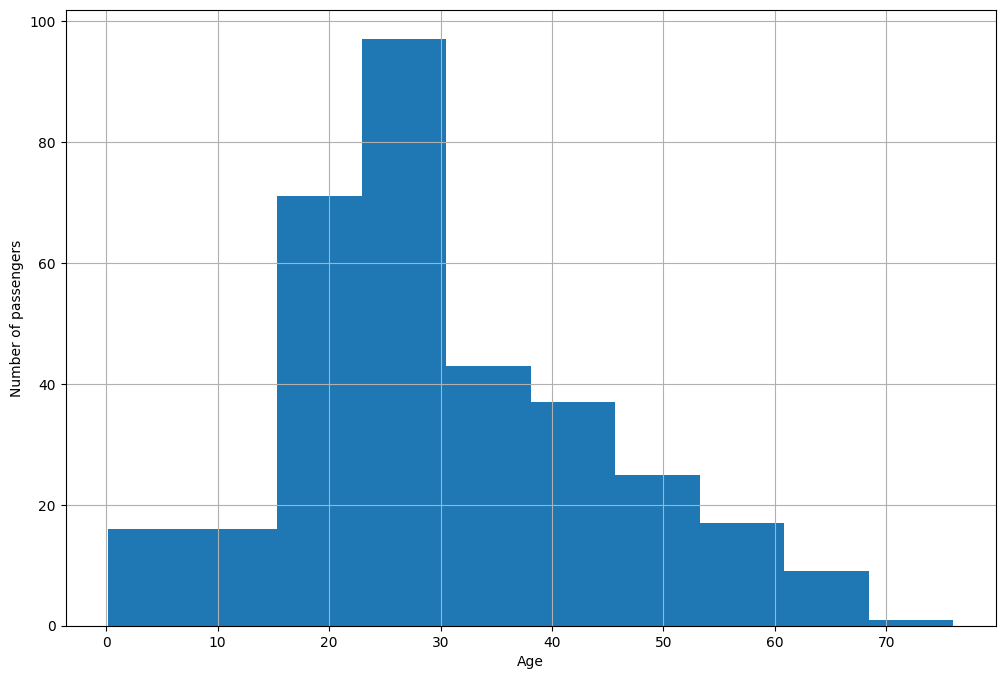

In [13]:
plt.figure(figsize=(12,8))
fig = test_data.Age.hist(bins=10)
fig.set_ylabel('Number of passengers')
fig.set_xlabel('Age')

In [14]:
# We can see that the Age distribution is skewed 
# So, we will use the median imputation
median_train = train_data.Age.median()
median_test = test_data.Age.median()
train_data['Age'].fillna(median_train, inplace=True)
test_data['Age'].fillna(median_test, inplace=True)

/var/folders/r9/ql9ltmp52sl7886y22z1hpx00000gn/T/ipykernel_4791/920057222.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data['Age'].fillna(median_train, inplace=True)
/var/folders/r9/ql9ltmp52sl7886y22z1hpx00000gn/T/ipykernel_4791/920057222.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values alwa

In [15]:
train_data['Age'] = train_data['Age'].astype('int64')
test_data['Age'] = test_data['Age'].astype('int64')

In [16]:
# Impute missing values in Cabin
train_data['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [17]:
test_data['Cabin'].unique()

array([nan, 'B45', 'E31', 'B57 B59 B63 B66', 'B36', 'A21', 'C78', 'D34',
       'D19', 'A9', 'D15', 'C31', 'C23 C25 C27', 'F G63', 'B61', 'C53',
       'D43', 'C130', 'C132', 'C101', 'C55 C57', 'B71', 'C46', 'C116',
       'F', 'A29', 'G6', 'C6', 'C28', 'C51', 'E46', 'C54', 'C97', 'D22',
       'B10', 'F4', 'E45', 'E52', 'D30', 'B58 B60', 'E34', 'C62 C64',
       'A11', 'B11', 'C80', 'F33', 'C85', 'D37', 'C86', 'D21', 'C89',
       'F E46', 'A34', 'D', 'B26', 'C22 C26', 'B69', 'C32', 'B78',
       'F E57', 'F2', 'A18', 'C106', 'B51 B53 B55', 'D10 D12', 'E60',
       'E50', 'E39 E41', 'B52 B54 B56', 'C39', 'B24', 'D28', 'B41', 'C7',
       'D40', 'D38', 'C105'], dtype=object)

In [18]:
train_data['Cabin'].value_counts()

Cabin
G6             4
C23 C25 C27    4
B96 B98        4
F2             3
D              3
              ..
E17            1
A24            1
C50            1
B42            1
C148           1
Name: count, Length: 147, dtype: int64

In [19]:
test_data['Cabin'].value_counts()

Cabin
B57 B59 B63 B66    3
B45                2
C23 C25 C27        2
C78                2
C31                2
                  ..
B41                1
C7                 1
D40                1
D38                1
C105               1
Name: count, Length: 76, dtype: int64

In [20]:
train_data['Cabin'].fillna("NA", inplace=True)

/var/folders/r9/ql9ltmp52sl7886y22z1hpx00000gn/T/ipykernel_4791/2140952843.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data['Cabin'].fillna("NA", inplace=True)


In [21]:
test_data['Cabin'].fillna("NA", inplace=True)

/var/folders/r9/ql9ltmp52sl7886y22z1hpx00000gn/T/ipykernel_4791/707721030.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_data['Cabin'].fillna("NA", inplace=True)


In [22]:
train_data['Deck'] = train_data['Cabin'].str.slice(0, 1)
test_data['Deck'] = test_data['Cabin'].str.slice(0, 1)

In [23]:
train_data['Deck'].unique()

array(['N', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [24]:
train_data['Deck'].value_counts()

Deck
N    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: count, dtype: int64

In [25]:
test_data['Deck'].value_counts()

Deck
N    327
C     35
B     18
D     13
E      9
F      8
A      7
G      1
Name: count, dtype: int64

In [26]:
train_data = train_data.drop(['Cabin'], axis=1)
test_data = test_data.drop(['Cabin'], axis=1)

In [27]:
# Impute missing values in Embarked
train_data['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [28]:
train_data['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [29]:
train_data['Embarked'].fillna("S", inplace=True)

/var/folders/r9/ql9ltmp52sl7886y22z1hpx00000gn/T/ipykernel_4791/3297700021.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data['Embarked'].fillna("S", inplace=True)


In [30]:
# Drop missing values in Fare
test_data['Fare'].fillna(10000, inplace=True)
test_data = test_data[test_data['Fare'] != 10000]


/var/folders/r9/ql9ltmp52sl7886y22z1hpx00000gn/T/ipykernel_4791/712731879.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_data['Fare'].fillna(10000, inplace=True)


In [31]:
# Check the count of missing values per variable
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    string 
 3   Age       891 non-null    int64  
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
 8   Deck      891 non-null    object 
dtypes: float64(1), int64(5), object(2), string(1)
memory usage: 62.8+ KB


In [32]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 417 entries, 0 to 417
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    417 non-null    int64  
 1   Sex       417 non-null    string 
 2   Age       417 non-null    int64  
 3   SibSp     417 non-null    int64  
 4   Parch     417 non-null    int64  
 5   Fare      417 non-null    float64
 6   Embarked  417 non-null    object 
 7   Deck      417 non-null    object 
dtypes: float64(1), int64(4), object(2), string(1)
memory usage: 29.3+ KB


In [33]:
# categorical data - encoding
train_data = pd.get_dummies(train_data, columns = ['Pclass', 'Sex', 'Embarked', 'Deck'])
train_data.head()

,Survived,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,...,Embarked_S,Deck_A,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_N,Deck_T
0,0,22,1,0,7.2500,False,False,True,False,True,...,True,False,False,False,False,False,False,False,True,False
1,1,38,1,0,71.2833,True,False,False,True,False,...,False,False,False,True,False,False,False,False,False,False
2,1,26,0,0,7.9250,False,False,True,True,False,...,True,False,False,False,False,False,False,False,True,False
3,1,35,1,0,53.1000,True,False,False,True,False,...,True,False,False,True,False,False,False,False,False,False
4,0,35,0,0,8.0500,False,False,True,False,True,...,True,False,False,False,False,False,False,False,True,False


In [34]:
test_data = pd.get_dummies(test_data, columns = ['Pclass', 'Sex', 'Embarked', 'Deck'])
test_data.head()

,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Deck_A,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_N
0,34,0,0,7.8292,False,False,True,False,True,False,True,False,False,False,False,False,False,False,False,True
1,47,1,0,7.0000,False,False,True,True,False,False,False,True,False,False,False,False,False,False,False,True
2,62,0,0,9.6875,False,True,False,False,True,False,True,False,False,False,False,False,False,False,False,True
3,27,0,0,8.6625,False,False,True,False,True,False,False,True,False,False,False,False,False,False,False,True
4,22,1,1,12.2875,False,False,True,True,False,False,False,True,False,False,False,False,False,False,False,True


In [35]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 22 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Age         891 non-null    int64  
 2   SibSp       891 non-null    int64  
 3   Parch       891 non-null    int64  
 4   Fare        891 non-null    float64
 5   Pclass_1    891 non-null    bool   
 6   Pclass_2    891 non-null    bool   
 7   Pclass_3    891 non-null    bool   
 8   Sex_female  891 non-null    boolean
 9   Sex_male    891 non-null    boolean
 10  Embarked_C  891 non-null    bool   
 11  Embarked_Q  891 non-null    bool   
 12  Embarked_S  891 non-null    bool   
 13  Deck_A      891 non-null    bool   
 14  Deck_B      891 non-null    bool   
 15  Deck_C      891 non-null    bool   
 16  Deck_D      891 non-null    bool   
 17  Deck_E      891 non-null    bool   
 18  Deck_F      891 non-null    bool   
 19  Deck_G      891 non-null    b

In [36]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 417 entries, 0 to 417
Data columns (total 20 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Age         417 non-null    int64  
 1   SibSp       417 non-null    int64  
 2   Parch       417 non-null    int64  
 3   Fare        417 non-null    float64
 4   Pclass_1    417 non-null    bool   
 5   Pclass_2    417 non-null    bool   
 6   Pclass_3    417 non-null    bool   
 7   Sex_female  417 non-null    boolean
 8   Sex_male    417 non-null    boolean
 9   Embarked_C  417 non-null    bool   
 10  Embarked_Q  417 non-null    bool   
 11  Embarked_S  417 non-null    bool   
 12  Deck_A      417 non-null    bool   
 13  Deck_B      417 non-null    bool   
 14  Deck_C      417 non-null    bool   
 15  Deck_D      417 non-null    bool   
 16  Deck_E      417 non-null    bool   
 17  Deck_F      417 non-null    bool   
 18  Deck_G      417 non-null    bool   
 19  Deck_N      417 non-null    bool  

In [37]:
train_data = train_data.drop(['Deck_N'], axis=1)
train_data = train_data.drop(['Deck_T'], axis=1)
test_data = test_data.drop(['Deck_N'], axis=1)

In [38]:
train_data['Pclass_1'] = train_data['Pclass_1'].astype('int64')
train_data['Pclass_2'] = train_data['Pclass_2'].astype('int64')
train_data['Pclass_3'] = train_data['Pclass_3'].astype('int64')
train_data['Sex_female'] = train_data['Sex_female'].astype('int64')
train_data['Sex_male'] = train_data['Sex_male'].astype('int64')
train_data['Embarked_C'] = train_data['Embarked_C'].astype('int64')
train_data['Embarked_Q'] = train_data['Embarked_Q'].astype('int64')
train_data['Embarked_S'] = train_data['Embarked_S'].astype('int64')
train_data['Deck_A'] = train_data['Deck_A'].astype('int64')
train_data['Deck_B'] = train_data['Deck_B'].astype('int64')
train_data['Deck_C'] = train_data['Deck_C'].astype('int64')
train_data['Deck_D'] = train_data['Deck_D'].astype('int64')
train_data['Deck_E'] = train_data['Deck_E'].astype('int64')
train_data['Deck_F'] = train_data['Deck_F'].astype('int64')
train_data['Deck_G'] = train_data['Deck_G'].astype('int64')
train_data['Deck_T'] = train_data['Deck_T'].astype('int64')

KeyError: 'Deck_T'

In [ ]:
test_data['Pclass_1'] = test_data['Pclass_1'].astype('int64')
test_data['Pclass_2'] = test_data['Pclass_2'].astype('int64')
test_data['Pclass_3'] = test_data['Pclass_3'].astype('int64')
test_data['Sex_female'] = test_data['Sex_female'].astype('int64')
test_data['Sex_male'] = test_data['Sex_male'].astype('int64')
test_data['Embarked_C'] = test_data['Embarked_C'].astype('int64')
test_data['Embarked_Q'] = test_data['Embarked_Q'].astype('int64')
test_data['Embarked_S'] = test_data['Embarked_S'].astype('int64')
test_data['Deck_A'] = test_data['Deck_A'].astype('int64')
test_data['Deck_B'] = test_data['Deck_B'].astype('int64')
test_data['Deck_C'] = test_data['Deck_C'].astype('int64')
test_data['Deck_D'] = test_data['Deck_D'].astype('int64')
test_data['Deck_E'] = test_data['Deck_E'].astype('int64')
test_data['Deck_F'] = test_data['Deck_F'].astype('int64')
test_data['Deck_G'] = test_data['Deck_G'].astype('int64')

In [ ]:
train_data.head()

In [ ]:
train_data.info()

In [ ]:
test_data.head()

In [ ]:
test_data.info()

In [ ]:
# outlier engineering

# let's make boxplots to visualise outliers in the continuous variables 
# Age and Fare

plt.figure(figsize=(15,6))
plt.subplot(1, 2, 1)
fig = train_data.boxplot(column='Age')
fig.set_title('')
fig.set_ylabel('Age')

plt.subplot(1, 2, 2)
fig = train_data.boxplot(column='Fare')
fig.set_title('')
fig.set_ylabel('Fare')

In [ ]:
plt.figure(figsize=(15,6))
plt.subplot(1, 2, 1)
fig = test_data.boxplot(column='Age')
fig.set_title('')
fig.set_ylabel('Age')

plt.subplot(1, 2, 2)
fig = test_data.boxplot(column='Fare')
fig.set_title('')
fig.set_ylabel('Fare')

In [ ]:
# first we plot the distributions to find out if they are Gaussian or skewed.
# Depending on the distribution, we will use the normal assumption or the interquantile
# range to find outliers

plt.figure(figsize=(15,6))
plt.subplot(1, 2, 1)
fig = train_data.Age.hist(bins=20)
fig.set_ylabel('Number of passengers')
fig.set_xlabel('Age')

plt.subplot(1, 2, 2)
fig = train_data.Fare.hist(bins=20)
fig.set_ylabel('Number of passengers')
fig.set_xlabel('Fare')

In [ ]:
plt.figure(figsize=(15,6))
plt.subplot(1, 2, 1)
fig = test_data.Age.hist(bins=20)
fig.set_ylabel('Number of passengers')
fig.set_xlabel('Age')

plt.subplot(1, 2, 2)
fig = test_data.Fare.hist(bins=20)
fig.set_ylabel('Number of passengers')
fig.set_xlabel('Fare')

In [ ]:
# train_data find outliers

# Age
Upper_boundary = train_data.Age.mean() + 3* train_data.Age.std()
Lower_boundary = train_data.Age.mean() - 3* train_data.Age.std()
print('Age outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_boundary, upperboundary=Upper_boundary))

# Fare
IQR = train_data.Fare.quantile(0.75) - train_data.Fare.quantile(0.25)
Lower_fence = train_data.Fare.quantile(0.25) - (IQR * 3)
Upper_fence = train_data.Fare.quantile(0.75) + (IQR * 3)
print('Fare outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))


In [ ]:
# view the statistical summary of Age
train_data.Age.describe()

In [ ]:
# top-coding the Age variable
train_data.loc[train_data.Age>73, 'Age'] = 73
train_data.Age.max()

In [ ]:
# view statistical properties of Fare
train_data.Fare.describe()

In [ ]:
# top-coding: capping the variable Fare at 100
train_data.loc[train_data.Fare>100, 'Fare'] = 100
train_data.Fare.max()

In [ ]:
# test_data find outliers

# Age
Upper_boundary = test_data.Age.mean() + 3* test_data.Age.std()
Lower_boundary = test_data.Age.mean() - 3* test_data.Age.std()
print('Age outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_boundary, upperboundary=Upper_boundary))

# Fare
IQR = test_data.Fare.quantile(0.75) - test_data.Fare.quantile(0.25)
Lower_fence = test_data.Fare.quantile(0.25) - (IQR * 3)
Upper_fence = test_data.Fare.quantile(0.75) + (IQR * 3)
print('Fare outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))


In [ ]:
test_data.Age.describe()

In [ ]:
# top-coding the Age variable
test_data.loc[train_data.Age>67, 'Age'] = 67
test_data.Age.max()

In [ ]:
test_data.Fare.describe()

In [ ]:
test_data.loc[test_data.Fare>102, 'Fare'] = 102
test_data.Fare.max()

### Exploratory Data Analysis

### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
train_y = train_data['Survived']
train_data = train_data.drop(['Survived'], axis=1)

In [ ]:
# logistic regression
model = LogisticRegression()
model.fit(train_data, train_y)

In [ ]:
y_pred = model.predict(test_data)
